In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(missing_values=np.nan,strategy='median')
from sklearn.ensemble import BaggingRegressor
import xgboost
from numpy import nan
from numpy import isnan
from sklearn.metrics import mean_squared_error

In [2]:
train = pd.read_csv('train.csv',index_col='Id')
test = pd.read_csv('test.csv', index_col='Id')

In [3]:
mis_val = train.isnull().sum()[train.isnull().sum()>0].sort_values(ascending=False)
mis_val_percentage = round(mis_val / len(train) *100, 2)
mis_val_table = pd.concat([mis_val, mis_val_percentage], axis = 1).rename(columns = {0:'Missing Values', 1: '% of Total Values'})
mis_val_table

Missing Values  % of Total Values
PoolQC                  1453              99.52
MiscFeature             1406              96.30
Alley                   1369              93.77
Fence                   1179              80.75
FireplaceQu              690              47.26
LotFrontage              259              17.74
GarageYrBlt               81               5.55
GarageType                81               5.55
GarageFinish              81               5.55
GarageQual                81               5.55
GarageCond                81               5.55
BsmtFinType2              38               2.60
BsmtExposure              38               2.60
BsmtFinType1              37               2.53
BsmtCond                  37               2.53
BsmtQual                  37               2.53
MasVnrArea                 8               0.55
MasVnrType                 8               0.55
Electrical                 1               0.07

In [4]:
missing_columns = list(mis_val_table[mis_val_table['% of Total Values'] > 10]. index)
len(missing_columns)

6

In [5]:
train = train.drop(columns = list (missing_columns))
train

MSSubClass MSZoning  LotArea Street LotShape LandContour Utilities  \
Id                                                                         
1             60       RL     8450   Pave      Reg         Lvl    AllPub   
2             20       RL     9600   Pave      Reg         Lvl    AllPub   
3             60       RL    11250   Pave      IR1         Lvl    AllPub   
4             70       RL     9550   Pave      IR1         Lvl    AllPub   
5             60       RL    14260   Pave      IR1         Lvl    AllPub   
...          ...      ...      ...    ...      ...         ...       ...   
1456          60       RL     7917   Pave      Reg         Lvl    AllPub   
1457          20       RL    13175   Pave      Reg         Lvl    AllPub   
1458          70       RL     9042   Pave      Reg         Lvl    AllPub   
1459          20       RL     9717   Pave      Reg         Lvl    AllPub   
1460          20       RL     9937   Pave      Reg         Lvl    AllPub   

     LotConfig LandSlope Neighborhood  ... EnclosedPorch 3SsnPorch  \
Id                                     ...                           
1       Inside       Gtl      CollgCr  ...             0         0   
2          FR2       Gtl      Veenker  ...             0         0   
3       Inside       Gtl      CollgCr  ...             0         0   
4       Corner       Gtl      Crawfor  ...           272         0   
5          FR2       Gtl      NoRidge  ...             0         0   
...        ...       ...          ...  ...           ...       ...   
1456    Inside       Gtl      Gilbert  ...             0         0   
1457    Inside       Gtl       NWAmes  ...             0         0   
1458    Inside       Gtl      Crawfor  ...             0         0   
1459    Inside       Gtl        NAmes  ...           112         0   
1460    Inside       Gtl      Edwards  ...             0         0   

     ScreenPorch PoolArea  MiscVal  MoSold  YrSold  SaleType SaleCondition  \
Id                                                                           
1              0        0        0       2    2008        WD        Normal   
2              0        0        0       5    2007        WD        Normal   
3              0        0        0       9    2008        WD        Normal   
4              0        0        0       2    2006        WD       Abnorml   
5              0        0        0      12    2008        WD        Normal   
...          ...      ...      ...     ...     ...       ...           ...   
1456           0        0        0       8    2007        WD        Normal   
1457           0        0        0       2    2010        WD        Normal   
1458           0        0     2500       5    2010        WD        Normal   
1459           0        0        0       4    2010        WD        Normal   
1460           0        0        0       6    2008        WD        Normal   

     SalePrice  
Id              
1       208500  
2       181500  
3       223500  
4       140000  
5       250000  
...        ...  
1456    175000  
1457    210000  
1458    266500  
1459    142125  
1460    147500  

[1460 rows x 74 columns]

In [6]:
test = test.drop(columns = missing_columns)
test

MSSubClass MSZoning  LotArea Street LotShape LandContour Utilities  \
Id                                                                         
1461          20       RH    11622   Pave      Reg         Lvl    AllPub   
1462          20       RL    14267   Pave      IR1         Lvl    AllPub   
1463          60       RL    13830   Pave      IR1         Lvl    AllPub   
1464          60       RL     9978   Pave      IR1         Lvl    AllPub   
1465         120       RL     5005   Pave      IR1         HLS    AllPub   
...          ...      ...      ...    ...      ...         ...       ...   
2915         160       RM     1936   Pave      Reg         Lvl    AllPub   
2916         160       RM     1894   Pave      Reg         Lvl    AllPub   
2917          20       RL    20000   Pave      Reg         Lvl    AllPub   
2918          85       RL    10441   Pave      Reg         Lvl    AllPub   
2919          60       RL     9627   Pave      Reg         Lvl    AllPub   

     LotConfig LandSlope Neighborhood  ... OpenPorchSF EnclosedPorch  \
Id                                     ...                             
1461    Inside       Gtl        NAmes  ...           0             0   
1462    Corner       Gtl        NAmes  ...          36             0   
1463    Inside       Gtl      Gilbert  ...          34             0   
1464    Inside       Gtl      Gilbert  ...          36             0   
1465    Inside       Gtl      StoneBr  ...          82             0   
...        ...       ...          ...  ...         ...           ...   
2915    Inside       Gtl      MeadowV  ...           0             0   
2916    Inside       Gtl      MeadowV  ...          24             0   
2917    Inside       Gtl      Mitchel  ...           0             0   
2918    Inside       Gtl      Mitchel  ...          32             0   
2919    Inside       Mod      Mitchel  ...          48             0   

     3SsnPorch ScreenPorch  PoolArea  MiscVal  MoSold  YrSold SaleType  \
Id                                                                       
1461         0         120         0        0       6    2010       WD   
1462         0           0         0    12500       6    2010       WD   
1463         0           0         0        0       3    2010       WD   
1464         0           0         0        0       6    2010       WD   
1465         0         144         0        0       1    2010       WD   
...        ...         ...       ...      ...     ...     ...      ...   
2915         0           0         0        0       6    2006       WD   
2916         0           0         0        0       4    2006       WD   
2917         0           0         0        0       9    2006       WD   
2918         0           0         0      700       7    2006       WD   
2919         0           0         0        0      11    2006       WD   

     SaleCondition  
Id                  
1461        Normal  
1462        Normal  
1463        Normal  
1464        Normal  
1465        Normal  
...            ...  
2915        Normal  
2916       Abnorml  
2917       Abnorml  
2918        Normal  
2919        Normal  

[1459 rows x 73 columns]

# Шаг 2: Исследовательский анализ данных

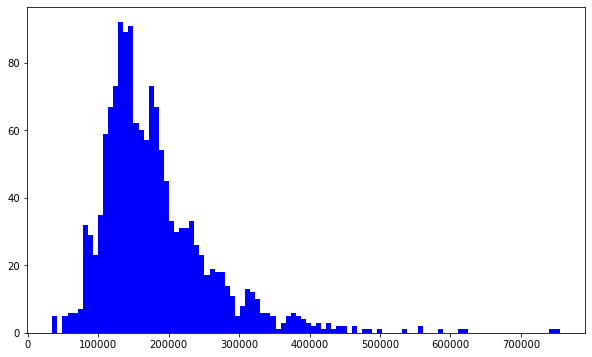

In [7]:
train['SalePrice'].hist(bins = 100, grid = False, color = 'blue', figsize = (10,6))
plt.show()

In [8]:
train.agg({'SalePrice':['mean', 'median','skew','kurtosis', 'std','min','max']})

SalePrice
mean      180921.195890
median    163000.000000
skew           1.882876
kurtosis       6.536282
std        79442.502883
min        34900.000000
max       755000.000000

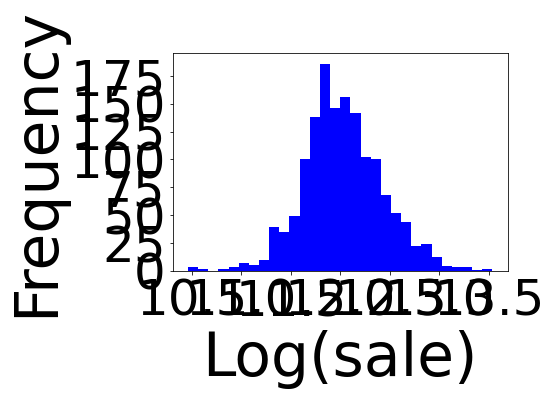

In [9]:
np.log(train['SalePrice']).plot.hist(bins=30, color = 'blue')
plt.xlabel('Log(sale)', fontsize=60)
plt.ylabel('Frequency', fontsize=60)
plt.xticks(fontsize =50)
plt.yticks(fontsize = 50)
plt.show()

# Numerical Features

In [10]:
train_numerical_subset = train.select_dtypes(include = [np.number])
train_numerical_subset

MSSubClass  LotArea  OverallQual  OverallCond  YearBuilt  YearRemodAdd  \
Id                                                                             
1             60     8450            7            5       2003          2003   
2             20     9600            6            8       1976          1976   
3             60    11250            7            5       2001          2002   
4             70     9550            7            5       1915          1970   
5             60    14260            8            5       2000          2000   
...          ...      ...          ...          ...        ...           ...   
1456          60     7917            6            5       1999          2000   
1457          20    13175            6            6       1978          1988   
1458          70     9042            7            9       1941          2006   
1459          20     9717            5            6       1950          1996   
1460          20     9937            5            6       1965          1965   

      MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  ...  WoodDeckSF  \
Id                                                   ...               
1          196.0         706           0        150  ...           0   
2            0.0         978           0        284  ...         298   
3          162.0         486           0        434  ...           0   
4            0.0         216           0        540  ...           0   
5          350.0         655           0        490  ...         192   
...          ...         ...         ...        ...  ...         ...   
1456         0.0           0           0        953  ...           0   
1457       119.0         790         163        589  ...         349   
1458         0.0         275           0        877  ...           0   
1459         0.0          49        1029          0  ...         366   
1460         0.0         830         290        136  ...         736   

      OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  \
Id                                                                            
1              61              0          0            0         0        0   
2               0              0          0            0         0        0   
3              42              0          0            0         0        0   
4              35            272          0            0         0        0   
5              84              0          0            0         0        0   
...           ...            ...        ...          ...       ...      ...   
1456           40              0          0            0         0        0   
1457            0              0          0            0         0        0   
1458           60              0          0            0         0     2500   
1459            0            112          0            0         0        0   
1460           68              0          0            0         0        0   

      MoSold  YrSold  SalePrice  
Id                               
1          2    2008     208500  
2          5    2007     181500  
3          9    2008     223500  
4          2    2006     140000  
5         12    2008     250000  
...      ...     ...        ...  
1456       8    2007     175000  
1457       2    2010     210000  
1458       5    2010     266500  
1459       4    2010     142125  
1460       6    2008     147500  

[1460 rows x 36 columns]

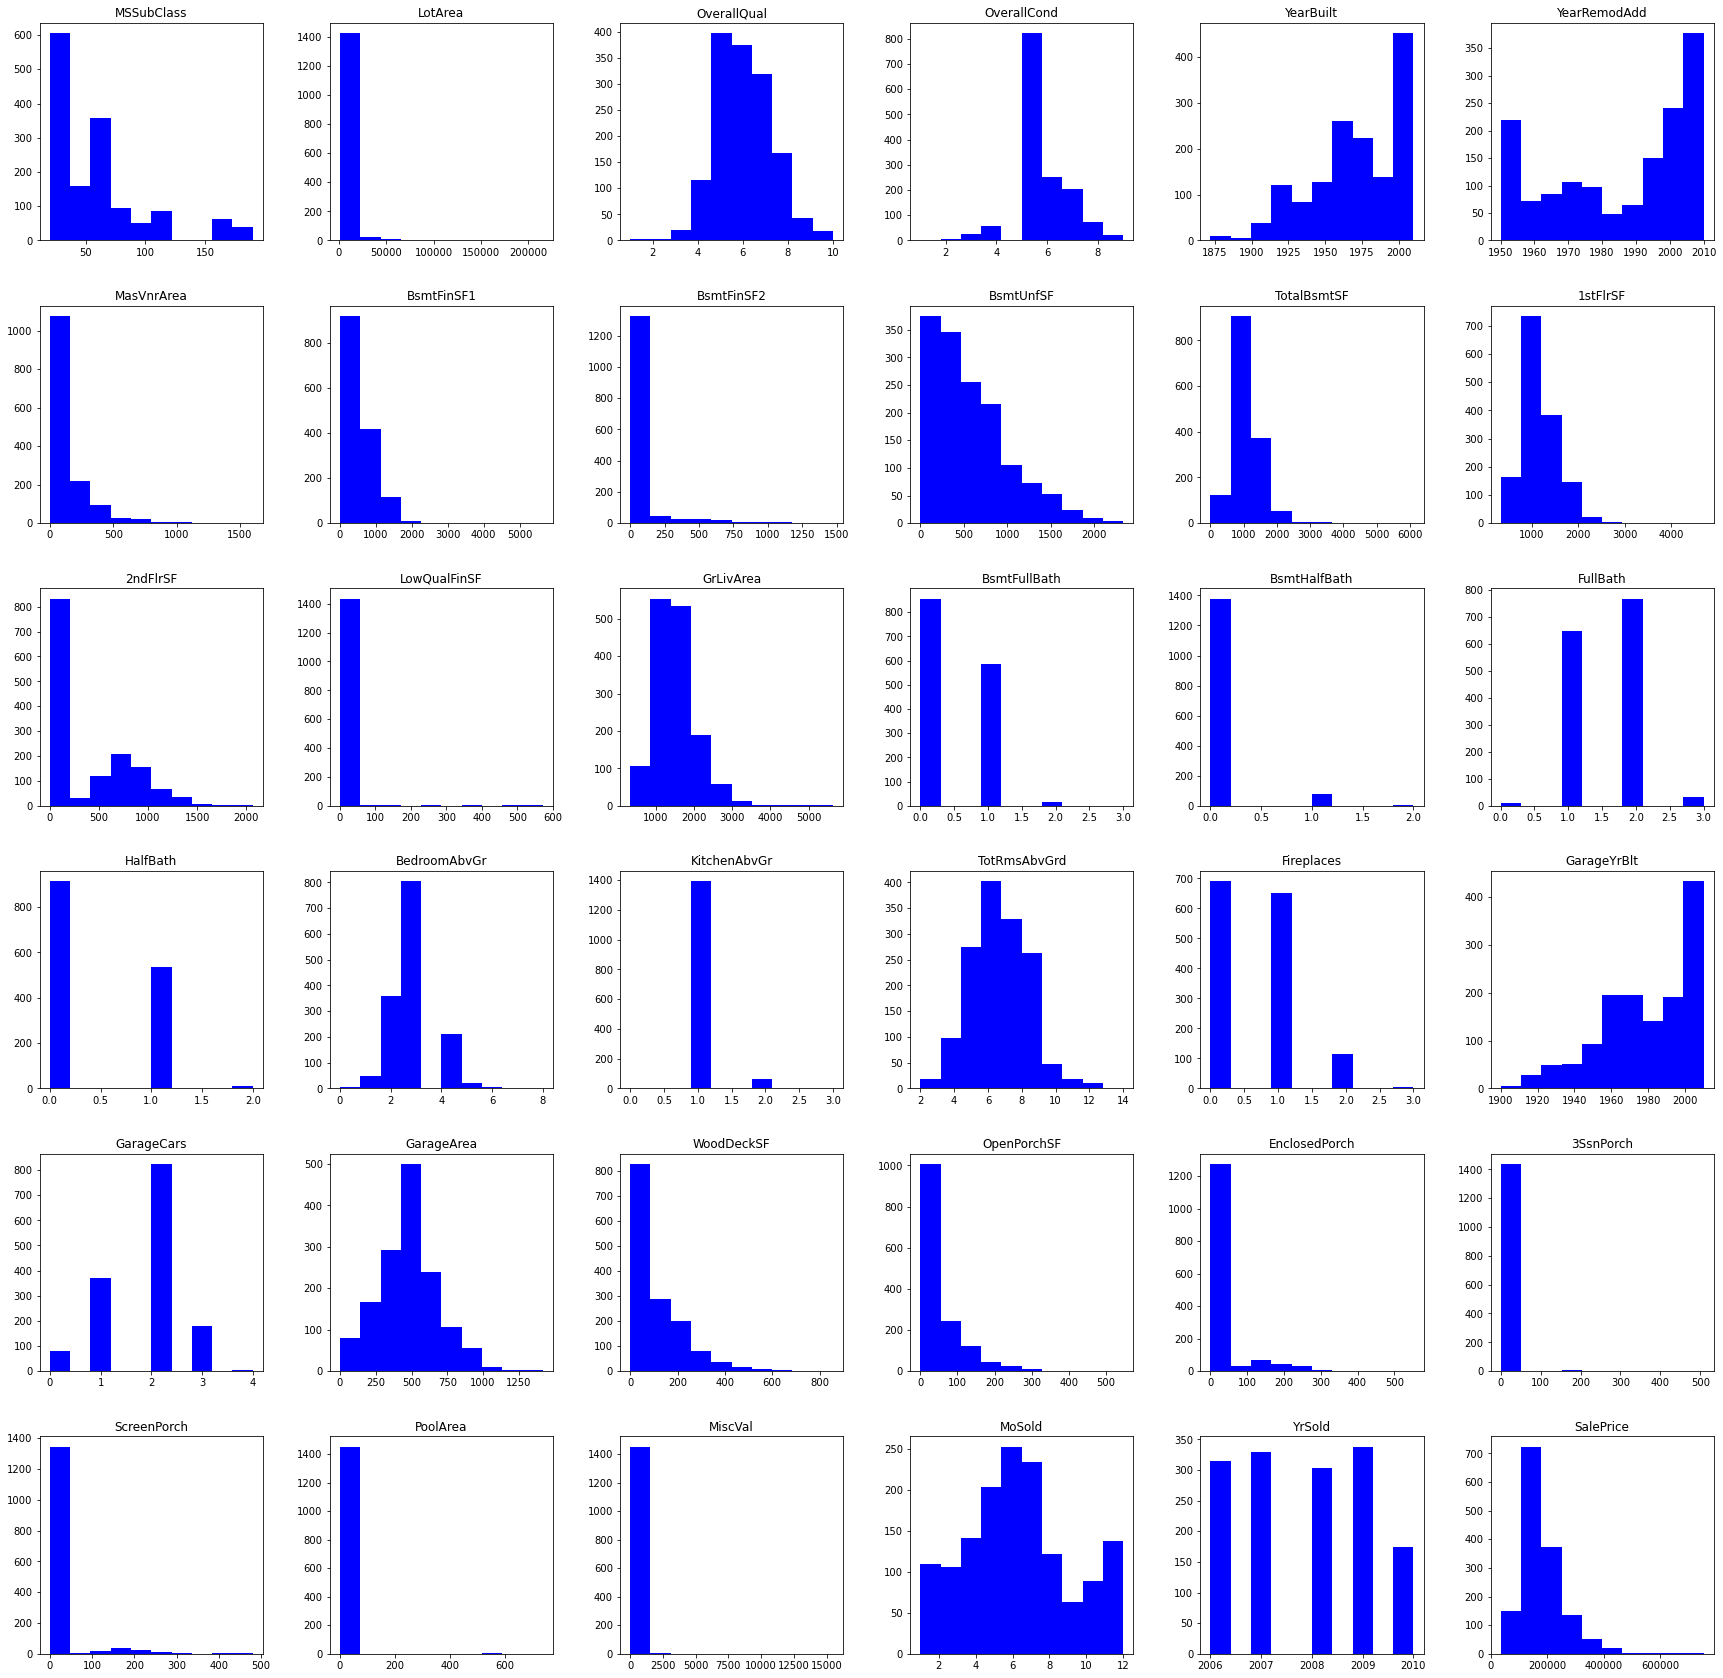

In [11]:
train_numerical_subset.hist(figsize = (30,30), grid = False, color ='blue')
plt.show()

In [12]:
num_rows = len(train_numerical_subset.index)
low_information_cols = []



In [13]:
for col in train_numerical_subset.columns:
    cnts = train_numerical_subset[col].value_counts(dropna=False)
    top_pct = (cnts/num_rows).iloc[0]
    
    if top_pct > 0.85:
        low_information_cols.append(col)
        print('{0}: {1:.5f}%'.format(col, top_pct*100))
        print(cnts)
        print()

BsmtFinSF2: 88.56164%
0       1293
180        5
374        3
551        2
93         2
        ... 
532        1
544        1
546        1
547        1
1474       1
Name: BsmtFinSF2, Length: 144, dtype: int64

LowQualFinSF: 98.21918%
0      1434
80        3
360       2
528       1
53        1
120       1
144       1
156       1
205       1
232       1
234       1
371       1
572       1
390       1
392       1
397       1
420       1
473       1
479       1
481       1
513       1
514       1
515       1
384       1
Name: LowQualFinSF, dtype: int64

BsmtHalfBath: 94.38356%
0    1378
1      80
2       2
Name: BsmtHalfBath, dtype: int64

KitchenAbvGr: 95.34247%
1    1392
2      65
3       2
0       1
Name: KitchenAbvGr, dtype: int64

EnclosedPorch: 85.75342%
0      1252
112      15
96        6
120       5
144       5
       ... 
174       1
177       1
183       1
189       1
552       1
Name: EnclosedPorch, Length: 120, dtype: int64

3SsnPorch: 98.35616%
0      1436
168       3
216     

In [14]:
train_numerical_subset = train_numerical_subset.drop(columns = ['PoolArea','ScreenPorch',
                 'EnclosedPorch','MiscVal','3SsnPorch','LowQualFinSF',
                'BsmtFinSF2', 'KitchenAbvGr','BsmtHalfBath'])
train_numerical_subset

MSSubClass  LotArea  OverallQual  OverallCond  YearBuilt  YearRemodAdd  \
Id                                                                             
1             60     8450            7            5       2003          2003   
2             20     9600            6            8       1976          1976   
3             60    11250            7            5       2001          2002   
4             70     9550            7            5       1915          1970   
5             60    14260            8            5       2000          2000   
...          ...      ...          ...          ...        ...           ...   
1456          60     7917            6            5       1999          2000   
1457          20    13175            6            6       1978          1988   
1458          70     9042            7            9       1941          2006   
1459          20     9717            5            6       1950          1996   
1460          20     9937            5            6       1965          1965   

      MasVnrArea  BsmtFinSF1  BsmtUnfSF  TotalBsmtSF  ...  TotRmsAbvGrd  \
Id                                                    ...                 
1          196.0         706        150          856  ...             8   
2            0.0         978        284         1262  ...             6   
3          162.0         486        434          920  ...             6   
4            0.0         216        540          756  ...             7   
5          350.0         655        490         1145  ...             9   
...          ...         ...        ...          ...  ...           ...   
1456         0.0           0        953          953  ...             7   
1457       119.0         790        589         1542  ...             7   
1458         0.0         275        877         1152  ...             9   
1459         0.0          49          0         1078  ...             5   
1460         0.0         830        136         1256  ...             6   

      Fireplaces  GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  \
Id                                                                  
1              0       2003.0           2         548           0   
2              1       1976.0           2         460         298   
3              1       2001.0           2         608           0   
4              1       1998.0           3         642           0   
5              1       2000.0           3         836         192   
...          ...          ...         ...         ...         ...   
1456           1       1999.0           2         460           0   
1457           2       1978.0           2         500         349   
1458           2       1941.0           1         252           0   
1459           0       1950.0           1         240         366   
1460           0       1965.0           1         276         736   

      OpenPorchSF  MoSold  YrSold  SalePrice  
Id                                            
1              61       2    2008     208500  
2               0       5    2007     181500  
3              42       9    2008     223500  
4              35       2    2006     140000  
5              84      12    2008     250000  
...           ...     ...     ...        ...  
1456           40       8    2007     175000  
1457            0       2    2010     210000  
1458           60       5    2010     266500  
1459            0       4    2010     142125  
1460           68       6    2008     147500  

[1460 rows x 27 columns]

In [15]:
test_numerical_subset = test.select_dtypes(include = [np.number])
test_numerical_subset = test_numerical_subset.drop(columns = ['PoolArea','ScreenPorch',
                 'EnclosedPorch','MiscVal','3SsnPorch','LowQualFinSF',
                'BsmtFinSF2', 'KitchenAbvGr','BsmtHalfBath'])
test_numerical_subset

MSSubClass  LotArea  OverallQual  OverallCond  YearBuilt  YearRemodAdd  \
Id                                                                             
1461          20    11622            5            6       1961          1961   
1462          20    14267            6            6       1958          1958   
1463          60    13830            5            5       1997          1998   
1464          60     9978            6            6       1998          1998   
1465         120     5005            8            5       1992          1992   
...          ...      ...          ...          ...        ...           ...   
2915         160     1936            4            7       1970          1970   
2916         160     1894            4            5       1970          1970   
2917          20    20000            5            7       1960          1996   
2918          85    10441            5            5       1992          1992   
2919          60     9627            7            5       1993          1994   

      MasVnrArea  BsmtFinSF1  BsmtUnfSF  TotalBsmtSF  ...  BedroomAbvGr  \
Id                                                    ...                 
1461         0.0       468.0      270.0        882.0  ...             2   
1462       108.0       923.0      406.0       1329.0  ...             3   
1463         0.0       791.0      137.0        928.0  ...             3   
1464        20.0       602.0      324.0        926.0  ...             3   
1465         0.0       263.0     1017.0       1280.0  ...             2   
...          ...         ...        ...          ...  ...           ...   
2915         0.0         0.0      546.0        546.0  ...             3   
2916         0.0       252.0      294.0        546.0  ...             3   
2917         0.0      1224.0        0.0       1224.0  ...             4   
2918         0.0       337.0      575.0        912.0  ...             3   
2919        94.0       758.0      238.0        996.0  ...             3   

      TotRmsAbvGrd  Fireplaces  GarageYrBlt  GarageCars  GarageArea  \
Id                                                                    
1461             5           0       1961.0         1.0       730.0   
1462             6           0       1958.0         1.0       312.0   
1463             6           1       1997.0         2.0       482.0   
1464             7           1       1998.0         2.0       470.0   
1465             5           0       1992.0         2.0       506.0   
...            ...         ...          ...         ...         ...   
2915             5           0          NaN         0.0         0.0   
2916             6           0       1970.0         1.0       286.0   
2917             7           1       1960.0         2.0       576.0   
2918             6           0          NaN         0.0         0.0   
2919             9           1       1993.0         3.0       650.0   

      WoodDeckSF  OpenPorchSF  MoSold  YrSold  
Id                                             
1461         140            0       6    2010  
1462         393           36       6    2010  
1463         212           34       3    2010  
1464         360           36       6    2010  
1465           0           82       1    2010  
...          ...          ...     ...     ...  
2915           0            0       6    2006  
2916           0           24       4    2006  
2917         474            0       9    2006  
2918          80           32       7    2006  
2919         190           48      11    2006  

[1459 rows x 26 columns]

# Корреляции между числовыми характеристиками и целевой переменной (SalePrice)

In [16]:
correlation = train_numerical_subset.corr()['SalePrice'].sort_values().dropna()
correlation.head()

MSSubClass     -0.084284
OverallCond    -0.077856
YrSold         -0.028923
MoSold          0.046432
BedroomAbvGr    0.168213
Name: SalePrice, dtype: float64

In [17]:
correlation.tail()

GarageArea     0.623431
GarageCars     0.640409
GrLivArea      0.708624
OverallQual    0.790982
SalePrice      1.000000
Name: SalePrice, dtype: float64

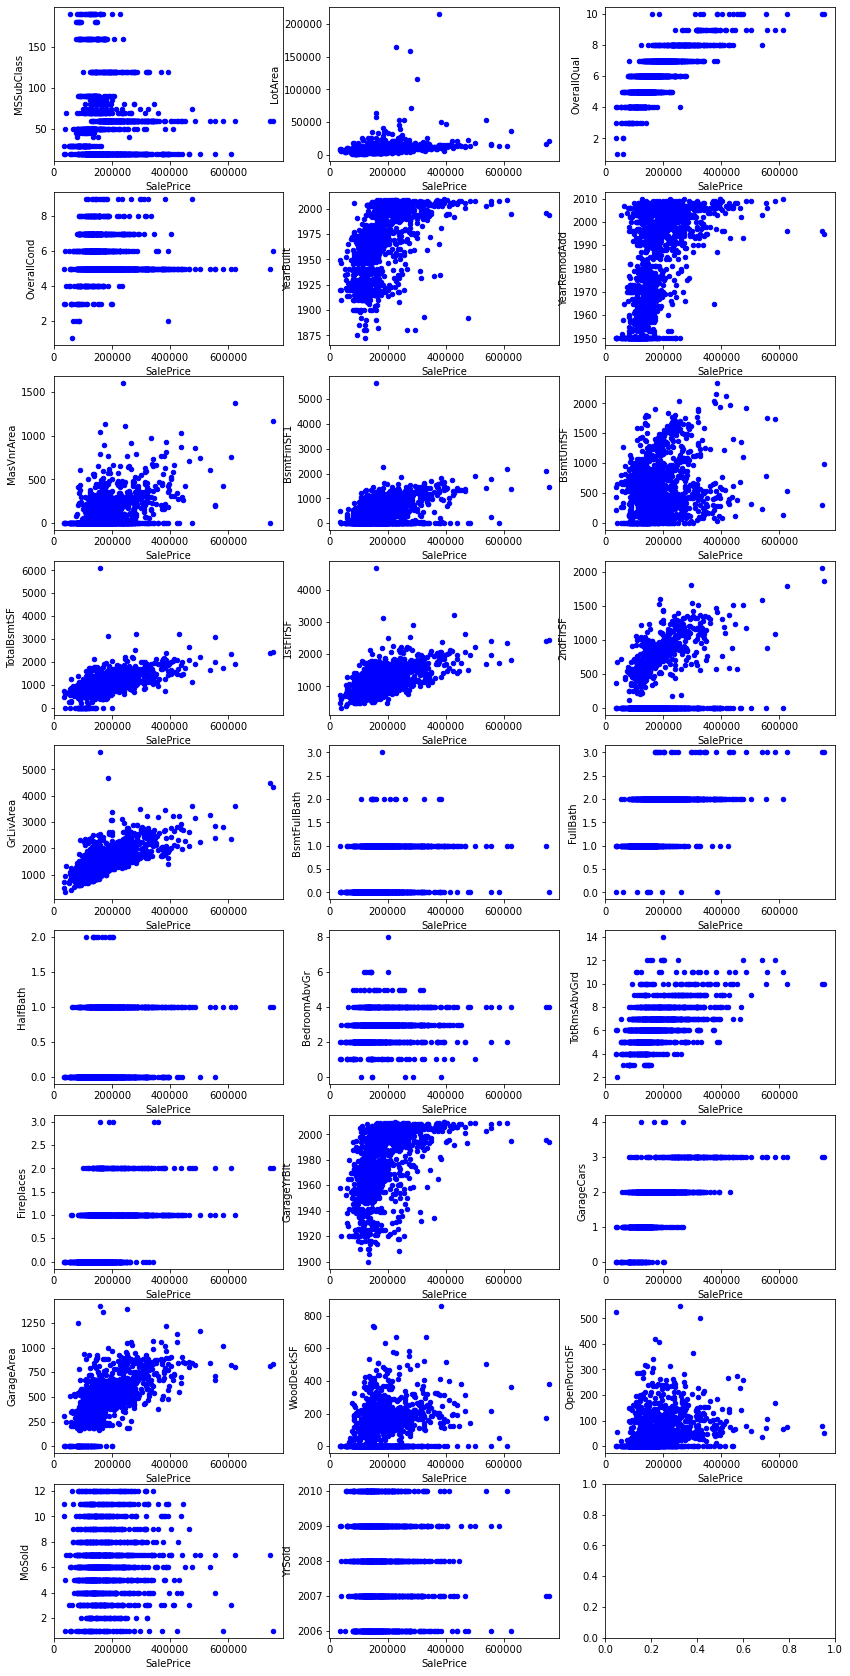

In [18]:
fig, axes = plt.subplots(9, 3, figsize=(14, 30))
axe = axes.ravel()
for i, col in enumerate(train_numerical_subset.columns.values[:-1]):
    train_numerical_subset.plot(x=('SalePrice'),y=(col),ax=axe[i], kind = 'scatter', color='blue')
plt.show()

# Categorical Features

In [19]:
train_categorical_subset = train.select_dtypes(exclude = [np.number])
train_categorical_subset

MSZoning Street LotShape LandContour Utilities LotConfig LandSlope  \
Id                                                                        
1          RL   Pave      Reg         Lvl    AllPub    Inside       Gtl   
2          RL   Pave      Reg         Lvl    AllPub       FR2       Gtl   
3          RL   Pave      IR1         Lvl    AllPub    Inside       Gtl   
4          RL   Pave      IR1         Lvl    AllPub    Corner       Gtl   
5          RL   Pave      IR1         Lvl    AllPub       FR2       Gtl   
...       ...    ...      ...         ...       ...       ...       ...   
1456       RL   Pave      Reg         Lvl    AllPub    Inside       Gtl   
1457       RL   Pave      Reg         Lvl    AllPub    Inside       Gtl   
1458       RL   Pave      Reg         Lvl    AllPub    Inside       Gtl   
1459       RL   Pave      Reg         Lvl    AllPub    Inside       Gtl   
1460       RL   Pave      Reg         Lvl    AllPub    Inside       Gtl   

     Neighborhood Condition1 Condition2  ... Electrical KitchenQual  \
Id                                       ...                          
1         CollgCr       Norm       Norm  ...      SBrkr          Gd   
2         Veenker      Feedr       Norm  ...      SBrkr          TA   
3         CollgCr       Norm       Norm  ...      SBrkr          Gd   
4         Crawfor       Norm       Norm  ...      SBrkr          Gd   
5         NoRidge       Norm       Norm  ...      SBrkr          Gd   
...           ...        ...        ...  ...        ...         ...   
1456      Gilbert       Norm       Norm  ...      SBrkr          TA   
1457       NWAmes       Norm       Norm  ...      SBrkr          TA   
1458      Crawfor       Norm       Norm  ...      SBrkr          Gd   
1459        NAmes       Norm       Norm  ...      FuseA          Gd   
1460      Edwards       Norm       Norm  ...      SBrkr          TA   

     Functional GarageType GarageFinish GarageQual GarageCond PavedDrive  \
Id                                                                         
1           Typ     Attchd          RFn         TA         TA          Y   
2           Typ     Attchd          RFn         TA         TA          Y   
3           Typ     Attchd          RFn         TA         TA          Y   
4           Typ     Detchd          Unf         TA         TA          Y   
5           Typ     Attchd          RFn         TA         TA          Y   
...         ...        ...          ...        ...        ...        ...   
1456        Typ     Attchd          RFn         TA         TA          Y   
1457       Min1     Attchd          Unf         TA         TA          Y   
1458        Typ     Attchd          RFn         TA         TA          Y   
1459        Typ     Attchd          Unf         TA         TA          Y   
1460        Typ     Attchd          Fin         TA         TA          Y   

     SaleType SaleCondition  
Id                           
1          WD        Normal  
2          WD        Normal  
3          WD        Normal  
4          WD       Abnorml  
5          WD        Normal  
...       ...           ...  
1456       WD        Normal  
1457       WD        Normal  
1458       WD        Normal  
1459       WD        Normal  
1460       WD        Normal  

[1460 rows x 38 columns]

In [20]:
num_rows = len(train_categorical_subset.index)
low_information_cols = []

for col in train_categorical_subset.columns:
    cnts = train_categorical_subset[col].value_counts(dropna=False)
    top_pct = (cnts/num_rows).iloc[0]
    
    if top_pct > 0.85:
        low_information_cols.append(col)
        print('{0}: {1:.5f}%'.format(col, top_pct*100))
        print(cnts)
        print()

Street: 99.58904%
Pave    1454
Grvl       6
Name: Street, dtype: int64

LandContour: 89.79452%
Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64

Utilities: 99.93151%
AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64

LandSlope: 94.65753%
Gtl    1382
Mod      65
Sev      13
Name: LandSlope, dtype: int64

Condition1: 86.30137%
Norm      1260
Feedr       81
Artery      48
RRAn        26
PosN        19
RRAe        11
PosA         8
RRNn         5
RRNe         2
Name: Condition1, dtype: int64

Condition2: 98.97260%
Norm      1445
Feedr        6
Artery       2
RRNn         2
PosN         2
RRAn         1
PosA         1
RRAe         1
Name: Condition2, dtype: int64

RoofMatl: 98.21918%
CompShg    1434
Tar&Grv      11
WdShngl       6
WdShake       5
ClyTile       1
Membran       1
Roll          1
Metal         1
Name: RoofMatl, dtype: int64

ExterCond: 87.80822%
TA    1282
Gd     146
Fa      28
Ex       3
Po       1
Name: ExterCond, dtype: int64

BsmtCo

## Train drop >85%

In [21]:
train_categorical_subset = train_categorical_subset.drop(columns = ['Street','LandContour',
            'Utilities','LandSlope','Condition1','Condition2','RoofMatl',
            'ExterCond','BsmtCond','BsmtFinType2','Heating','CentralAir',
            'Electrical','Functional', 'GarageQual','GarageCond','PavedDrive',
            'SaleType'])
train_categorical_subset

MSZoning LotShape LotConfig Neighborhood BldgType HouseStyle RoofStyle  \
Id                                                                            
1          RL      Reg    Inside      CollgCr     1Fam     2Story     Gable   
2          RL      Reg       FR2      Veenker     1Fam     1Story     Gable   
3          RL      IR1    Inside      CollgCr     1Fam     2Story     Gable   
4          RL      IR1    Corner      Crawfor     1Fam     2Story     Gable   
5          RL      IR1       FR2      NoRidge     1Fam     2Story     Gable   
...       ...      ...       ...          ...      ...        ...       ...   
1456       RL      Reg    Inside      Gilbert     1Fam     2Story     Gable   
1457       RL      Reg    Inside       NWAmes     1Fam     1Story     Gable   
1458       RL      Reg    Inside      Crawfor     1Fam     2Story     Gable   
1459       RL      Reg    Inside        NAmes     1Fam     1Story       Hip   
1460       RL      Reg    Inside      Edwards     1Fam     1Story     Gable   

     Exterior1st Exterior2nd MasVnrType ExterQual Foundation BsmtQual  \
Id                                                                      
1        VinylSd     VinylSd    BrkFace        Gd      PConc       Gd   
2        MetalSd     MetalSd       None        TA     CBlock       Gd   
3        VinylSd     VinylSd    BrkFace        Gd      PConc       Gd   
4        Wd Sdng     Wd Shng       None        TA     BrkTil       TA   
5        VinylSd     VinylSd    BrkFace        Gd      PConc       Gd   
...          ...         ...        ...       ...        ...      ...   
1456     VinylSd     VinylSd       None        TA      PConc       Gd   
1457     Plywood     Plywood      Stone        TA     CBlock       Gd   
1458     CemntBd     CmentBd       None        Ex      Stone       TA   
1459     MetalSd     MetalSd       None        TA     CBlock       TA   
1460     HdBoard     HdBoard       None        Gd     CBlock       TA   

     BsmtExposure BsmtFinType1 HeatingQC KitchenQual GarageType GarageFinish  \
Id                                                                             
1              No          GLQ        Ex          Gd     Attchd          RFn   
2              Gd          ALQ        Ex          TA     Attchd          RFn   
3              Mn          GLQ        Ex          Gd     Attchd          RFn   
4              No          ALQ        Gd          Gd     Detchd          Unf   
5              Av          GLQ        Ex          Gd     Attchd          RFn   
...           ...          ...       ...         ...        ...          ...   
1456           No          Unf        Ex          TA     Attchd          RFn   
1457           No          ALQ        TA          TA     Attchd          Unf   
1458           No          GLQ        Ex          Gd     Attchd          RFn   
1459           Mn          GLQ        Gd          Gd     Attchd          Unf   
1460           No          BLQ        Gd          TA     Attchd          Fin   

     SaleCondition  
Id                  
1           Normal  
2           Normal  
3           Normal  
4          Abnorml  
5           Normal  
...            ...  
1456        Normal  
1457        Normal  
1458        Normal  
1459        Normal  
1460        Normal  

[1460 rows x 20 columns]

## Тест дроп >85%

In [22]:
test_categorical_subset = test.select_dtypes(exclude = [np.number])
test_categorical_subset = test_categorical_subset.drop(columns = ['Street','LandContour',
            'Utilities','LandSlope','Condition1','Condition2','RoofMatl',
            'ExterCond','BsmtCond','BsmtFinType2','Heating','CentralAir',
            'Electrical','Functional', 'GarageQual','GarageCond','PavedDrive',
            'SaleType'])
test_categorical_subset

MSZoning LotShape LotConfig Neighborhood BldgType HouseStyle RoofStyle  \
Id                                                                            
1461       RH      Reg    Inside        NAmes     1Fam     1Story     Gable   
1462       RL      IR1    Corner        NAmes     1Fam     1Story       Hip   
1463       RL      IR1    Inside      Gilbert     1Fam     2Story     Gable   
1464       RL      IR1    Inside      Gilbert     1Fam     2Story     Gable   
1465       RL      IR1    Inside      StoneBr   TwnhsE     1Story     Gable   
...       ...      ...       ...          ...      ...        ...       ...   
2915       RM      Reg    Inside      MeadowV    Twnhs     2Story     Gable   
2916       RM      Reg    Inside      MeadowV   TwnhsE     2Story     Gable   
2917       RL      Reg    Inside      Mitchel     1Fam     1Story     Gable   
2918       RL      Reg    Inside      Mitchel     1Fam     SFoyer     Gable   
2919       RL      Reg    Inside      Mitchel     1Fam     2Story     Gable   

     Exterior1st Exterior2nd MasVnrType ExterQual Foundation BsmtQual  \
Id                                                                      
1461     VinylSd     VinylSd       None        TA     CBlock       TA   
1462     Wd Sdng     Wd Sdng    BrkFace        TA     CBlock       TA   
1463     VinylSd     VinylSd       None        TA      PConc       Gd   
1464     VinylSd     VinylSd    BrkFace        TA      PConc       TA   
1465     HdBoard     HdBoard       None        Gd      PConc       Gd   
...          ...         ...        ...       ...        ...      ...   
2915     CemntBd     CmentBd       None        TA     CBlock       TA   
2916     CemntBd     CmentBd       None        TA     CBlock       TA   
2917     VinylSd     VinylSd       None        TA     CBlock       TA   
2918     HdBoard     Wd Shng       None        TA      PConc       Gd   
2919     HdBoard     HdBoard    BrkFace        TA      PConc       Gd   

     BsmtExposure BsmtFinType1 HeatingQC KitchenQual GarageType GarageFinish  \
Id                                                                             
1461           No          Rec        TA          TA     Attchd          Unf   
1462           No          ALQ        TA          Gd     Attchd          Unf   
1463           No          GLQ        Gd          TA     Attchd          Fin   
1464           No          GLQ        Ex          Gd     Attchd          Fin   
1465           No          ALQ        Ex          Gd     Attchd          RFn   
...           ...          ...       ...         ...        ...          ...   
2915           No          Unf        Gd          TA        NaN          NaN   
2916           No          Rec        TA          TA    CarPort          Unf   
2917           No          ALQ        Ex          TA     Detchd          Unf   
2918           Av          GLQ        TA          TA        NaN          NaN   
2919           Av          LwQ        Ex          TA     Attchd          Fin   

     SaleCondition  
Id                  
1461        Normal  
1462        Normal  
1463        Normal  
1464        Normal  
1465        Normal  
...            ...  
2915        Normal  
2916       Abnorml  
2917       Abnorml  
2918        Normal  
2919        Normal  

[1459 rows x 20 columns]

# Step 3: Feature Engineering and Selection

In [23]:
np.seterr(divide = 'ignore')
log_train_numerical_subset = np.log(train_numerical_subset)
log_train_numerical_subset = log_train_numerical_subset.replace(to_replace = float('-inf'), value = 0)
log_train_numerical_subset

MSSubClass   LotArea  OverallQual  OverallCond  YearBuilt  YearRemodAdd  \
Id                                                                              
1       4.094345  9.041922     1.945910     1.609438   7.602401      7.602401   
2       2.995732  9.169518     1.791759     2.079442   7.588830      7.588830   
3       4.094345  9.328123     1.945910     1.609438   7.601402      7.601902   
4       4.248495  9.164296     1.945910     1.609438   7.557473      7.585789   
5       4.094345  9.565214     2.079442     1.609438   7.600902      7.600902   
...          ...       ...          ...          ...        ...           ...   
1456    4.094345  8.976768     1.791759     1.609438   7.600402      7.600902   
1457    2.995732  9.486076     1.791759     1.791759   7.589842      7.594884   
1458    4.248495  9.109636     1.945910     2.197225   7.570959      7.603898   
1459    2.995732  9.181632     1.609438     1.791759   7.575585      7.598900   
1460    2.995732  9.204020     1.609438     1.791759   7.583248      7.583248   

      MasVnrArea  BsmtFinSF1  BsmtUnfSF  TotalBsmtSF  ...  TotRmsAbvGrd  \
Id                                                    ...                 
1       5.278115    6.559615   5.010635     6.752270  ...      2.079442   
2       0.000000    6.885510   5.648974     7.140453  ...      1.791759   
3       5.087596    6.186209   6.073045     6.824374  ...      1.791759   
4       0.000000    5.375278   6.291569     6.628041  ...      1.945910   
5       5.857933    6.484635   6.194405     7.043160  ...      2.197225   
...          ...         ...        ...          ...  ...           ...   
1456    0.000000    0.000000   6.859615     6.859615  ...      1.945910   
1457    4.779123    6.672033   6.378426     7.340836  ...      1.945910   
1458    0.000000    5.616771   6.776507     7.049255  ...      2.197225   
1459    0.000000    3.891820   0.000000     6.982863  ...      1.609438   
1460    0.000000    6.721426   4.912655     7.135687  ...      1.791759   

      Fireplaces  GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  \
Id                                                                  
1       0.000000     7.602401    0.693147    6.306275    0.000000   
2       0.000000     7.588830    0.693147    6.131226    5.697093   
3       0.000000     7.601402    0.693147    6.410175    0.000000   
4       0.000000     7.599902    1.098612    6.464588    0.000000   
5       0.000000     7.600902    1.098612    6.728629    5.257495   
...          ...          ...         ...         ...         ...   
1456    0.000000     7.600402    0.693147    6.131226    0.000000   
1457    0.693147     7.589842    0.693147    6.214608    5.855072   
1458    0.693147     7.570959    0.000000    5.529429    0.000000   
1459    0.000000     7.575585    0.000000    5.480639    5.902633   
1460    0.000000     7.583248    0.000000    5.620401    6.601230   

      OpenPorchSF    MoSold    YrSold  SalePrice  
Id                                                
1        4.110874  0.693147  7.604894  12.247694  
2        0.000000  1.609438  7.604396  12.109011  
3        3.737670  2.197225  7.604894  12.317167  
4        3.555348  0.693147  7.603898  11.849398  
5        4.430817  2.484907  7.604894  12.429216  
...           ...       ...       ...        ...  
1456     3.688879  2.079442  7.604396  12.072541  
1457     0.000000  0.693147  7.605890  12.254863  
1458     4.094345  1.609438  7.605890  12.493130  
1459     0.000000  1.386294  7.605890  11.864462  
1460     4.219508  1.791759  7.604894  11.901583  

[1460 rows x 27 columns]

In [24]:
log_test_numerical_subset = np.log(test_numerical_subset)
log_test_numerical_subset = log_test_numerical_subset.replace(to_replace = float('-inf'), value = 0)
log_test_numerical_subset

MSSubClass   LotArea  OverallQual  OverallCond  YearBuilt  YearRemodAdd  \
Id                                                                              
1461    2.995732  9.360655     1.609438     1.791759   7.581210      7.581210   
1462    2.995732  9.565704     1.791759     1.791759   7.579679      7.579679   
1463    4.094345  9.534595     1.609438     1.609438   7.599401      7.599902   
1464    4.094345  9.208138     1.791759     1.791759   7.599902      7.599902   
1465    4.787492  8.518193     2.079442     1.609438   7.596894      7.596894   
...          ...       ...          ...          ...        ...           ...   
2915    5.075174  7.568379     1.386294     1.945910   7.585789      7.585789   
2916    5.075174  7.546446     1.386294     1.609438   7.585789      7.585789   
2917    2.995732  9.903488     1.609438     1.945910   7.580700      7.598900   
2918    4.442651  9.253496     1.609438     1.609438   7.596894      7.596894   
2919    4.094345  9.172327     1.945910     1.609438   7.597396      7.597898   

      MasVnrArea  BsmtFinSF1  BsmtUnfSF  TotalBsmtSF  ...  BedroomAbvGr  \
Id                                                    ...                 
1461    0.000000    6.148468   5.598422     6.782192  ...      0.693147   
1462    4.682131    6.827629   6.006353     7.192182  ...      1.098612   
1463    0.000000    6.673298   4.919981     6.833032  ...      1.098612   
1464    2.995732    6.400257   5.780744     6.830874  ...      1.098612   
1465    0.000000    5.572154   6.924612     7.154615  ...      0.693147   
...          ...         ...        ...          ...  ...           ...   
2915    0.000000    0.000000   6.302619     6.302619  ...      1.098612   
2916    0.000000    5.529429   5.683580     6.302619  ...      1.098612   
2917    0.000000    7.109879   0.000000     7.109879  ...      1.386294   
2918    0.000000    5.820083   6.354370     6.815640  ...      1.098612   
2919    4.543295    6.630683   5.472271     6.903747  ...      1.098612   

      TotRmsAbvGrd  Fireplaces  GarageYrBlt  GarageCars  GarageArea  \
Id                                                                    
1461      1.609438         0.0     7.581210    0.000000    6.593045   
1462      1.791759         0.0     7.579679    0.000000    5.743003   
1463      1.791759         0.0     7.599401    0.693147    6.177944   
1464      1.945910         0.0     7.599902    0.693147    6.152733   
1465      1.609438         0.0     7.596894    0.693147    6.226537   
...            ...         ...          ...         ...         ...   
2915      1.609438         0.0          NaN    0.000000    0.000000   
2916      1.791759         0.0     7.585789    0.000000    5.655992   
2917      1.945910         0.0     7.580700    0.693147    6.356108   
2918      1.791759         0.0          NaN    0.000000    0.000000   
2919      2.197225         0.0     7.597396    1.098612    6.476972   

      WoodDeckSF  OpenPorchSF    MoSold    YrSold  
Id                                                 
1461    4.941642     0.000000  1.791759  7.605890  
1462    5.973810     3.583519  1.791759  7.605890  
1463    5.356586     3.526361  1.098612  7.605890  
1464    5.886104     3.583519  1.791759  7.605890  
1465    0.000000     4.406719  0.000000  7.605890  
...          ...          ...       ...       ...  
2915    0.000000     0.000000  1.791759  7.603898  
2916    0.000000     3.178054  1.386294  7.603898  
2917    6.161207     0.000000  2.197225  7.603898  
2918    4.382027     3.465736  1.945910  7.603898  
2919    5.247024     3.871201  2.397895  7.603898  

[1459 rows x 26 columns]

In [25]:
train_categorical_subset.describe().T

count unique      top  freq
MSZoning       1460      5       RL  1151
LotShape       1460      4      Reg   925
LotConfig      1460      5   Inside  1052
Neighborhood   1460     25    NAmes   225
BldgType       1460      5     1Fam  1220
HouseStyle     1460      8   1Story   726
RoofStyle      1460      6    Gable  1141
Exterior1st    1460     15  VinylSd   515
Exterior2nd    1460     16  VinylSd   504
MasVnrType     1452      4     None   864
ExterQual      1460      4       TA   906
Foundation     1460      6    PConc   647
BsmtQual       1423      4       TA   649
BsmtExposure   1422      4       No   953
BsmtFinType1   1423      6      Unf   430
HeatingQC      1460      5       Ex   741
KitchenQual    1460      4       TA   735
GarageType     1379      6   Attchd   870
GarageFinish   1379      3      Unf   605
SaleCondition  1460      6   Normal  1198

In [26]:
test_categorical_subset.describe().T

count unique      top  freq
MSZoning       1455      5       RL  1114
LotShape       1459      4      Reg   934
LotConfig      1459      5   Inside  1081
Neighborhood   1459     25    NAmes   218
BldgType       1459      5     1Fam  1205
HouseStyle     1459      7   1Story   745
RoofStyle      1459      6    Gable  1169
Exterior1st    1458     13  VinylSd   510
Exterior2nd    1458     15  VinylSd   510
MasVnrType     1443      4     None   878
ExterQual      1459      4       TA   892
Foundation     1459      6    PConc   661
BsmtQual       1415      4       TA   634
BsmtExposure   1415      4       No   951
BsmtFinType1   1417      6      GLQ   431
HeatingQC      1459      5       Ex   752
KitchenQual    1458      4       TA   757
GarageType     1383      6   Attchd   853
GarageFinish   1381      3      Unf   625
SaleCondition  1459      6   Normal  1204

In [27]:
train_categorical_subset['HouseStyle'] = train_categorical_subset['HouseStyle'].replace(['2.5Fin'],train_categorical_subset['HouseStyle'].mode())
train_categorical_subset['Exterior1st'] = train_categorical_subset['Exterior1st'].replace(['Stone'],train_categorical_subset['Exterior1st'].mode())
train_categorical_subset['Exterior1st'] = train_categorical_subset['Exterior1st'].replace(['ImStucc'],train_categorical_subset['Exterior1st'].mode())
train_categorical_subset['Exterior2nd'] = train_categorical_subset['Exterior2nd'].replace(['Other'],train_categorical_subset['Exterior1st'].mode())

Теперь и обучающий, и тестовый набор данных имеют одинаковое количество уникальных значений.

Применение one Hot-Encode к категориальным данным

In [28]:
train_categorical_subset = pd.get_dummies(train_categorical_subset)
test_categorical_subset = pd.get_dummies(test_categorical_subset)

print(train_categorical_subset.shape)
print(test_categorical_subset.shape)

(1460, 137)
(1459, 137)


In [29]:
train_features = pd.concat([log_train_numerical_subset,train_categorical_subset], axis = 1)
test_features = pd.concat([log_test_numerical_subset,test_categorical_subset], axis = 1)

In [30]:
train_features = train_features[:-1]
train_features

MSSubClass   LotArea  OverallQual  OverallCond  YearBuilt  YearRemodAdd  \
Id                                                                              
1       4.094345  9.041922     1.945910     1.609438   7.602401      7.602401   
2       2.995732  9.169518     1.791759     2.079442   7.588830      7.588830   
3       4.094345  9.328123     1.945910     1.609438   7.601402      7.601902   
4       4.248495  9.164296     1.945910     1.609438   7.557473      7.585789   
5       4.094345  9.565214     2.079442     1.609438   7.600902      7.600902   
...          ...       ...          ...          ...        ...           ...   
1455    2.995732  8.922658     1.945910     1.609438   7.602900      7.603399   
1456    4.094345  8.976768     1.791759     1.609438   7.600402      7.600902   
1457    2.995732  9.486076     1.791759     1.791759   7.589842      7.594884   
1458    4.248495  9.109636     1.945910     2.197225   7.570959      7.603898   
1459    2.995732  9.181632     1.609438     1.791759   7.575585      7.598900   

      MasVnrArea  BsmtFinSF1  BsmtUnfSF  TotalBsmtSF  ...  GarageType_Detchd  \
Id                                                    ...                      
1       5.278115    6.559615   5.010635     6.752270  ...                  0   
2       0.000000    6.885510   5.648974     7.140453  ...                  0   
3       5.087596    6.186209   6.073045     6.824374  ...                  0   
4       0.000000    5.375278   6.291569     6.628041  ...                  1   
5       5.857933    6.484635   6.194405     7.043160  ...                  0   
...          ...         ...        ...          ...  ...                ...   
1455    0.000000    6.016157   6.698268     7.107425  ...                  0   
1456    0.000000    0.000000   6.859615     6.859615  ...                  0   
1457    4.779123    6.672033   6.378426     7.340836  ...                  0   
1458    0.000000    5.616771   6.776507     7.049255  ...                  0   
1459    0.000000    3.891820   0.000000     6.982863  ...                  0   

      GarageFinish_Fin  GarageFinish_RFn  GarageFinish_Unf  \
Id                                                           
1                    0                 1                 0   
2                    0                 1                 0   
3                    0                 1                 0   
4                    0                 0                 1   
5                    0                 1                 0   
...                ...               ...               ...   
1455                 0                 1                 0   
1456                 0                 1                 0   
1457                 0                 0                 1   
1458                 0                 1                 0   
1459                 0                 0                 1   

      SaleCondition_Abnorml  SaleCondition_AdjLand  SaleCondition_Alloca  \
Id                                                                         
1                         0                      0                     0   
2                         0                      0                     0   
3                         0                      0                     0   
4                         1                      0                     0   
5                         0                      0                     0   
...                     ...                    ...                   ...   
1455                      0                      0                     0   
1456                      0                      0                     0   
1457                      0                      0                     0   
1458                      0                      0                     0   
1459                      0                      0                     0   

      SaleCondition_Family  SaleCondition_Normal  SaleCondition_Partial  
Id                                       

In [31]:
test_features

MSSubClass   LotArea  OverallQual  OverallCond  YearBuilt  YearRemodAdd  \
Id                                                                              
1461    2.995732  9.360655     1.609438     1.791759   7.581210      7.581210   
1462    2.995732  9.565704     1.791759     1.791759   7.579679      7.579679   
1463    4.094345  9.534595     1.609438     1.609438   7.599401      7.599902   
1464    4.094345  9.208138     1.791759     1.791759   7.599902      7.599902   
1465    4.787492  8.518193     2.079442     1.609438   7.596894      7.596894   
...          ...       ...          ...          ...        ...           ...   
2915    5.075174  7.568379     1.386294     1.945910   7.585789      7.585789   
2916    5.075174  7.546446     1.386294     1.609438   7.585789      7.585789   
2917    2.995732  9.903488     1.609438     1.945910   7.580700      7.598900   
2918    4.442651  9.253496     1.609438     1.609438   7.596894      7.596894   
2919    4.094345  9.172327     1.945910     1.609438   7.597396      7.597898   

      MasVnrArea  BsmtFinSF1  BsmtUnfSF  TotalBsmtSF  ...  GarageType_Detchd  \
Id                                                    ...                      
1461    0.000000    6.148468   5.598422     6.782192  ...                  0   
1462    4.682131    6.827629   6.006353     7.192182  ...                  0   
1463    0.000000    6.673298   4.919981     6.833032  ...                  0   
1464    2.995732    6.400257   5.780744     6.830874  ...                  0   
1465    0.000000    5.572154   6.924612     7.154615  ...                  0   
...          ...         ...        ...          ...  ...                ...   
2915    0.000000    0.000000   6.302619     6.302619  ...                  0   
2916    0.000000    5.529429   5.683580     6.302619  ...                  0   
2917    0.000000    7.109879   0.000000     7.109879  ...                  1   
2918    0.000000    5.820083   6.354370     6.815640  ...                  0   
2919    4.543295    6.630683   5.472271     6.903747  ...                  0   

      GarageFinish_Fin  GarageFinish_RFn  GarageFinish_Unf  \
Id                                                           
1461                 0                 0                 1   
1462                 0                 0                 1   
1463                 1                 0                 0   
1464                 1                 0                 0   
1465                 0                 1                 0   
...                ...               ...               ...   
2915                 0                 0                 0   
2916                 0                 0                 1   
2917                 0                 0                 1   
2918                 0                 0                 0   
2919                 1                 0                 0   

      SaleCondition_Abnorml  SaleCondition_AdjLand  SaleCondition_Alloca  \
Id                                                                         
1461                      0                      0                     0   
1462                      0                      0                     0   
1463                      0                      0                     0   
1464                      0                      0                     0   
1465                      0                      0                     0   
...                     ...                    ...                   ...   
2915                      0                      0                     0   
2916                      1                      0                     0   
2917                      1                      0                     0   
2918                      0                      0                     0   
2919                      0                      0                     0   

      SaleCondition_Family  SaleCondition_Normal  SaleCondition_Partial  
Id                                       

# Удаление коллинеарных функций

In [32]:
train_features_multicollinearity = train_features.corr()
train_features_multicollinearity

MSSubClass   LotArea  OverallQual  OverallCond  \
MSSubClass               1.000000 -0.376285     0.091703    -0.032875   
LotArea                 -0.376285  1.000000     0.163042    -0.004831   
OverallQual              0.091703  0.163042     1.000000     0.025015   
OverallCond             -0.032875 -0.004831     0.025015     1.000000   
YearBuilt               -0.005806  0.022240     0.553437    -0.303883   
...                           ...       ...          ...          ...   
SaleCondition_AdjLand    0.030839 -0.013788    -0.039472    -0.044369   
SaleCondition_Alloca     0.043337  0.016985    -0.041911    -0.035523   
SaleCondition_Family     0.004328 -0.004307    -0.023086    -0.020943   
SaleCondition_Normal     0.033918 -0.018323    -0.121135     0.155419   
SaleCondition_Partial   -0.067316  0.061645     0.291389    -0.133491   

                       YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  \
MSSubClass             -0.005806      0.038983    0.012158   -0.092380   
LotArea                 0.022240      0.027874    0.070958    0.097079   
OverallQual             0.553437      0.536775    0.396718    0.063701   
OverallCond            -0.303883      0.091814   -0.127115    0.057850   
YearBuilt               1.000000      0.589876    0.413356    0.153376   
...                          ...           ...         ...         ...   
SaleCondition_AdjLand  -0.045542     -0.040335   -0.014980   -0.018871   
SaleCondition_Alloca   -0.009645     -0.020497   -0.019442   -0.010318   
SaleCondition_Family   -0.035581     -0.048156    0.005909   -0.035760   
SaleCondition_Normal   -0.156954     -0.119642   -0.089517    0.097544   
SaleCondition_Partial   0.341366      0.321620    0.165364   -0.100889   

                       BsmtUnfSF  TotalBsmtSF  ...  GarageType_Detchd  \
MSSubClass             -0.108368    -0.110138  ...           0.066284   
LotArea                 0.047528     0.125614  ...          -0.213957   
OverallQual             0.272248     0.364481  ...          -0.323622   
OverallCond            -0.028806     0.025035  ...           0.159932   
YearBuilt               0.088372     0.198228  ...          -0.487392   
...                          ...          ...  ...                ...   
SaleCondition_AdjLand  -0.070666    -0.080420  ...          -0.001811   
SaleCondition_Alloca   -0.129960    -0.122415  ...          -0.003146   
SaleCondition_Family   -0.012792     0.023207  ...           0.022632   
SaleCondition_Normal   -0.075900    -0.063561  ...           0.082902   
SaleCondition_Partial   0.148145     0.121426  ...          -0.156187   

                       GarageFinish_Fin  GarageFinish_RFn  GarageFinish_Unf  \
MSSubClass                     0.040195         -0.051267         -0.016995   
LotArea                        0.122945          0.072800         -0.108477   
OverallQual                    0.366069          0.231642         -0.393021   
OverallCond                   -0.109635         -0.064972          0.176977   
YearBuilt                      0.392588          0.314072         -0.521996   
...                                 ...               ...               ...   
SaleCondition_AdjLand         -0.029511         -0.033448         -0.017525   
SaleCondition_Alloca          -0.033501         -0.041356          0.061984   
SaleCondition_Family           0.002599         -0.036204          0.044349   
SaleCondition_Normal          -0.095958         -0.016617          0.118315   
SaleCondition_Partial          0.205841          0.085580         -0.232794   

                       SaleCondition_Abnorml  SaleCondition_AdjLand  \
MSSubClass                         -0.000821               0.030839   
LotArea                            -0.041494              -0.013788   
OverallQual                        -0.104498              -0.039472   
OverallCond                        -0.056451              -0.044369   
YearBuilt                          -0.109949              -0.045542   
...  

In [33]:
# checking the any variables who correlation coeffcient is above 70.
len(train_features_multicollinearity[train_features_multicollinearity > .70])

164

# Объединение тренировочных и тестовых данных

In [34]:
merged_data = pd.concat([train_features, test_features], axis = 0)
merged_data

MSSubClass   LotArea  OverallQual  OverallCond  YearBuilt  YearRemodAdd  \
Id                                                                              
1       4.094345  9.041922     1.945910     1.609438   7.602401      7.602401   
2       2.995732  9.169518     1.791759     2.079442   7.588830      7.588830   
3       4.094345  9.328123     1.945910     1.609438   7.601402      7.601902   
4       4.248495  9.164296     1.945910     1.609438   7.557473      7.585789   
5       4.094345  9.565214     2.079442     1.609438   7.600902      7.600902   
...          ...       ...          ...          ...        ...           ...   
2915    5.075174  7.568379     1.386294     1.945910   7.585789      7.585789   
2916    5.075174  7.546446     1.386294     1.609438   7.585789      7.585789   
2917    2.995732  9.903488     1.609438     1.945910   7.580700      7.598900   
2918    4.442651  9.253496     1.609438     1.609438   7.596894      7.596894   
2919    4.094345  9.172327     1.945910     1.609438   7.597396      7.597898   

      MasVnrArea  BsmtFinSF1  BsmtUnfSF  TotalBsmtSF  ...  GarageType_Detchd  \
Id                                                    ...                      
1       5.278115    6.559615   5.010635     6.752270  ...                  0   
2       0.000000    6.885510   5.648974     7.140453  ...                  0   
3       5.087596    6.186209   6.073045     6.824374  ...                  0   
4       0.000000    5.375278   6.291569     6.628041  ...                  1   
5       5.857933    6.484635   6.194405     7.043160  ...                  0   
...          ...         ...        ...          ...  ...                ...   
2915    0.000000    0.000000   6.302619     6.302619  ...                  0   
2916    0.000000    5.529429   5.683580     6.302619  ...                  0   
2917    0.000000    7.109879   0.000000     7.109879  ...                  1   
2918    0.000000    5.820083   6.354370     6.815640  ...                  0   
2919    4.543295    6.630683   5.472271     6.903747  ...                  0   

      GarageFinish_Fin  GarageFinish_RFn  GarageFinish_Unf  \
Id                                                           
1                    0                 1                 0   
2                    0                 1                 0   
3                    0                 1                 0   
4                    0                 0                 1   
5                    0                 1                 0   
...                ...               ...               ...   
2915                 0                 0                 0   
2916                 0                 0                 1   
2917                 0                 0                 1   
2918                 0                 0                 0   
2919                 1                 0                 0   

      SaleCondition_Abnorml  SaleCondition_AdjLand  SaleCondition_Alloca  \
Id                                                                         
1                         0                      0                     0   
2                         0                      0                     0   
3                         0                      0                     0   
4                         1                      0                     0   
5                         0                      0                     0   
...                     ...                    ...                   ...   
2915                      0                      0                     0   
2916                      1                      0                     0   
2917                      1                      0                     0   
2918                      0                      0                     0   
2919                      0                      0                     0   

      SaleCondition_Family  SaleCondition_Normal  SaleCondition_Partial  
Id                                       

# Разделение на наборы для обучения и тестирования

In [35]:
train = merged_data.iloc[:1459,:]
test = merged_data.iloc[1459:,:]
print(train.shape)
print(test.shape)

(1459, 164)
(1459, 164)


In [36]:
test =test.drop(['SalePrice'], axis = 1)
test.shape

(1459, 163)

In [37]:
X_train = train.drop(['SalePrice'], axis = 1)
y_train = np.array(train['SalePrice']).reshape((-1,1))
X_test = test

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)

(1459, 163)
(1459, 1)
(1459, 163)


# Заполнение пропусков

In [38]:
imputer = SimpleImputer(missing_values=nan, strategy='median')
X_train = imputer.fit_transform(X_train)
print('Missing: %d' % isnan(X_train).sum())

Missing: 0


In [39]:
y_train = imputer.fit_transform(y_train)
print('Missing: %d' % isnan(y_train).sum())

Missing: 0


In [40]:
X_test = imputer.fit_transform(X_test)
print('Missing: %d' % isnan(X_test).sum())

Missing: 0


In [41]:
# Make sure all values are finite
print(np.where(~np.isfinite(X_train)))
print(np.where(~np.isfinite(y_train)))
print(np.where(~np.isfinite(X_test)))

(array([], dtype=int64), array([], dtype=int64))
(array([], dtype=int64), array([], dtype=int64))
(array([], dtype=int64), array([], dtype=int64))


In [42]:
a = pd.DataFrame(X_test)
a

0         1         2         3         4         5         6    \
0     2.995732  9.360655  1.609438  1.791759  7.581210  7.581210  0.000000   
1     2.995732  9.565704  1.791759  1.791759  7.579679  7.579679  4.682131   
2     4.094345  9.534595  1.609438  1.609438  7.599401  7.599902  0.000000   
3     4.094345  9.208138  1.791759  1.791759  7.599902  7.599902  2.995732   
4     4.787492  8.518193  2.079442  1.609438  7.596894  7.596894  0.000000   
...        ...       ...       ...       ...       ...       ...       ...   
1454  5.075174  7.568379  1.386294  1.945910  7.585789  7.585789  0.000000   
1455  5.075174  7.546446  1.386294  1.609438  7.585789  7.585789  0.000000   
1456  2.995732  9.903488  1.609438  1.945910  7.580700  7.598900  0.000000   
1457  4.442651  9.253496  1.609438  1.609438  7.596894  7.596894  0.000000   
1458  4.094345  9.172327  1.945910  1.609438  7.597396  7.597898  4.543295   

           7         8         9    ...  153  154  155  156  157  158  159  \
0     6.148468  5.598422  6.782192  ...  0.0  0.0  0.0  1.0  0.0  0.0  0.0   
1     6.827629  6.006353  7.192182  ...  0.0  0.0  0.0  1.0  0.0  0.0  0.0   
2     6.673298  4.919981  6.833032  ...  0.0  1.0  0.0  0.0  0.0  0.0  0.0   
3     6.400257  5.780744  6.830874  ...  0.0  1.0  0.0  0.0  0.0  0.0  0.0   
4     5.572154  6.924612  7.154615  ...  0.0  0.0  1.0  0.0  0.0  0.0  0.0   
...        ...       ...       ...  ...  ...  ...  ...  ...  ...  ...  ...   
1454  0.000000  6.302619  6.302619  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1455  5.529429  5.683580  6.302619  ...  0.0  0.0  0.0  1.0  1.0  0.0  0.0   
1456  7.109879  0.000000  7.109879  ...  1.0  0.0  0.0  1.0  1.0  0.0  0.0   
1457  5.820083  6.354370  6.815640  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1458  6.630683  5.472271  6.903747  ...  0.0  1.0  0.0  0.0  0.0  0.0  0.0   

      160  161  162  
0     0.0  1.0  0.0  
1     0.0  1.0  0.0  
2     0.0  1.0  0.0  
3     0.0  1.0  0.0  
4     0.0  1.0  0.0  
...   ...  ...  ...  
1454  0.0  1.0  0.0  
1455  0.0  0.0  0.0  
1456  0.0  0.0  0.0  
1457  0.0  1.0  0.0  
1458  0.0  1.0  0.0  

[1459 rows x 163 columns]

In [43]:
a = pd.DataFrame(X_train)
a

0         1         2         3         4         5         6    \
0     4.094345  9.041922  1.945910  1.609438  7.602401  7.602401  5.278115   
1     2.995732  9.169518  1.791759  2.079442  7.588830  7.588830  0.000000   
2     4.094345  9.328123  1.945910  1.609438  7.601402  7.601902  5.087596   
3     4.248495  9.164296  1.945910  1.609438  7.557473  7.585789  0.000000   
4     4.094345  9.565214  2.079442  1.609438  7.600902  7.600902  5.857933   
...        ...       ...       ...       ...       ...       ...       ...   
1454  2.995732  8.922658  1.945910  1.609438  7.602900  7.603399  0.000000   
1455  4.094345  8.976768  1.791759  1.609438  7.600402  7.600902  0.000000   
1456  2.995732  9.486076  1.791759  1.791759  7.589842  7.594884  4.779123   
1457  4.248495  9.109636  1.945910  2.197225  7.570959  7.603898  0.000000   
1458  2.995732  9.181632  1.609438  1.791759  7.575585  7.598900  0.000000   

           7         8         9    ...  153  154  155  156  157  158  159  \
0     6.559615  5.010635  6.752270  ...  0.0  0.0  1.0  0.0  0.0  0.0  0.0   
1     6.885510  5.648974  7.140453  ...  0.0  0.0  1.0  0.0  0.0  0.0  0.0   
2     6.186209  6.073045  6.824374  ...  0.0  0.0  1.0  0.0  0.0  0.0  0.0   
3     5.375278  6.291569  6.628041  ...  1.0  0.0  0.0  1.0  1.0  0.0  0.0   
4     6.484635  6.194405  7.043160  ...  0.0  0.0  1.0  0.0  0.0  0.0  0.0   
...        ...       ...       ...  ...  ...  ...  ...  ...  ...  ...  ...   
1454  6.016157  6.698268  7.107425  ...  0.0  0.0  1.0  0.0  0.0  0.0  0.0   
1455  0.000000  6.859615  6.859615  ...  0.0  0.0  1.0  0.0  0.0  0.0  0.0   
1456  6.672033  6.378426  7.340836  ...  0.0  0.0  0.0  1.0  0.0  0.0  0.0   
1457  5.616771  6.776507  7.049255  ...  0.0  0.0  1.0  0.0  0.0  0.0  0.0   
1458  3.891820  0.000000  6.982863  ...  0.0  0.0  0.0  1.0  0.0  0.0  0.0   

      160  161  162  
0     0.0  1.0  0.0  
1     0.0  1.0  0.0  
2     0.0  1.0  0.0  
3     0.0  0.0  0.0  
4     0.0  1.0  0.0  
...   ...  ...  ...  
1454  0.0  1.0  0.0  
1455  0.0  1.0  0.0  
1456  0.0  1.0  0.0  
1457  0.0  1.0  0.0  
1458  0.0  1.0  0.0  

[1459 rows x 163 columns]

# Model to Evaluate

In [44]:
def RMSE(y_train, y_pred):
    return mean_squared_error(y_train, y_pred,squared = False)

In [45]:
def fit_and_evaluate (model):
    model.fit(X_train, y_train.ravel())
    model_pred = model.predict(X_test)
    model_RMSE = RMSE(y_train, model_pred)
    
    return model_RMSE

In [46]:
# Support Vector Regressor
svr = SVR(C=1000, gamma = 0.1)
svr_RMSE = fit_and_evaluate(svr)
svr_RMSE

0.47132559184049727

In [47]:
# Random Forest Regressor
random_forest = RandomForestRegressor(random_state=60)
random_forest_RMSE = fit_and_evaluate(random_forest)
random_forest_RMSE

0.5404380271000233

In [48]:
# Gradient Boosting Regressor
gradient_boosted = GradientBoostingRegressor(learning_rate = 0.1,random_state=60)
gradient_boosted_RMSE = fit_and_evaluate(gradient_boosted)
gradient_boosted_RMSE

0.5504183214580101

In [49]:
# Bagging Regressor
bagging = BaggingRegressor()
bagging_RMSE = fit_and_evaluate(bagging)
bagging_RMSE

0.5433248238941915

In [50]:
#XGB Regressor
xboost = xgboost.XGBRegressor(random_state = 60)
xboost_RMSE = fit_and_evaluate(xboost)
xboost_RMSE

0.5587065809942185

In [51]:
# KNeighbors Regressor
knn = KNeighborsRegressor(n_neighbors=10)
knn_RMSE = fit_and_evaluate(knn)
knn_RMSE

0.5103854276512614

# Сравнение моделей

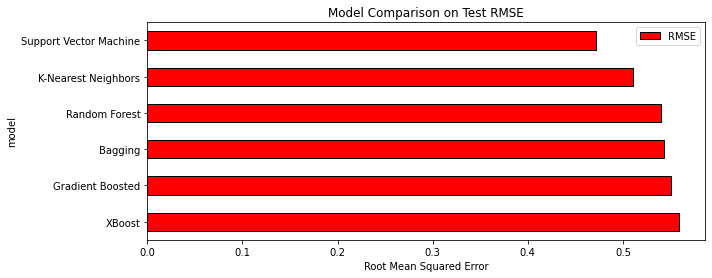

In [52]:
model_comparison = pd.DataFrame({'model': [ 'Support Vector Machine',
                                           'Random Forest', 'Gradient Boosted',
                                            'K-Nearest Neighbors', 'Bagging','XBoost'],
                                 'RMSE': [svr_RMSE, random_forest_RMSE, 
                                         gradient_boosted_RMSE, knn_RMSE,bagging_RMSE,xboost_RMSE]})

model_comparison.sort_values('RMSE', ascending = False).plot(x = 'model',
                                                             y = 'RMSE', kind = 'barh', color = 'red',
                                                             edgecolor = 'black', figsize = (10,4))
plt.xlabel('Root Mean Squared Error')
plt.title('Model Comparison on Test RMSE')
plt.show()

# SVMR

In [53]:
SVM = SVR().fit(X_train, y_train.ravel())
score = SVM.score(X_train, y_train)
print('R_squared:', score)
print('RMSE:', svr_RMSE)

R_squared: 0.8873301230904915
RMSE: 0.47132559184049727


In [54]:
from sklearn.model_selection import GridSearchCV

param = {'kernel' : ['linear', 'poly', 'rbf', 'sigmoid'],
        'C' : [1,5,10],
        'degree' : [3,8],
         'coef0' : [0.01,10,0.5],
         'gamma' : ['auto','scale']}


grids = GridSearchCV(SVR(), param, scoring='neg_mean_squared_error', cv=5)

grids.fit(X_train, y_train.ravel())

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [1, 5, 10], 'coef0': [0.01, 10, 0.5],
                         'degree': [3, 8], 'gamma': ['auto', 'scale'],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             scoring='neg_mean_squared_error')

In [55]:
print(f'Best score MSE : {-(grids.best_score_)}')
print(f'Best parametrs : {grids.best_params_}')

Best score MSE : 0.0176897309534934
Best parametrs : {'C': 5, 'coef0': 0.01, 'degree': 3, 'gamma': 'scale', 'kernel': 'rbf'}


In [56]:
y_pred = grids.predict(X_test)

In [57]:
HousePrice_Prediction_without_log = np.exp(y_pred)
submission = pd.DataFrame()
submission['Id'] = np.arange(1461,2920)
submission['SalePrice'] = HousePrice_Prediction_without_log

In [58]:
#0.12958 1396
submission

Id      SalePrice
0     1461  115777.144478
1     1462  165630.856130
2     1463  178148.367347
3     1464  199438.405736
4     1465  188295.214349
...    ...            ...
1454  2915   86257.767845
1455  2916   75610.473327
1456  2917  160353.077155
1457  2918  111058.842440
1458  2919  205183.552832

[1459 rows x 2 columns]

In [59]:
#submission.to_csv('answer1/submission.csv', index=False)

# Ensemble X_train, y_train.ravel() X_test

In [62]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X_train, y_train.ravel(), test_size= 0.2)

In [63]:
models_scores = [] # To store model scores

def rmse(model):
    model.fit(Xtrain, ytrain)
    y_pred = model.predict(Xtest)
    
    return mean_squared_error(ytest, y_pred, squared= False) # squared= False > returns Root Mean Square Error                  

## Linear Regression

In [64]:
#linear_regression = make_pipeline(LinearRegression())
#score = rmse(linear_regression)

#models_scores.append(['LinearRegression', score])
#print(f'LinearRegression Score= {score}')

In [65]:
lasso = make_pipeline(RobustScaler(), Lasso(alpha=0.0005, random_state= random_state))

score = rmse(lasso)
models_scores.append(['Lasso', score])
print(f'Lasso Score= {score}')

NameError: name 'make_pipeline' is not defined

In [ ]:
elastic_net = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio= .9, random_state= random_state))

score = rmse(elastic_net)
models_scores.append(['ElasticNet', score])
print(f'ElasticNet Score= {score}')

In [66]:
kernel_ridge= KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5)
score = rmse(kernel_ridge)
models_scores.append(['KernelRidge', score])
print(f'KernelRidge Score= {score}')

NameError: name 'KernelRidge' is not defined

In [ ]:
pd.DataFrame(models_scores).sort_values(by=[1], ascending=True)

In [67]:
def bagging_predictions(estimator):
    """
    I/P
    estimator: The base estimator from which the ensemble is grown.
    O/P
    br_y_pred: Predictions on test data for the base estimator.
    
    """
    regr = BaggingRegressor(base_estimator=estimator,
                            n_estimators=10,
                            max_samples=1.0,
                            bootstrap=True, 
                            n_jobs= n_jobs,
                            random_state=random_state).fit(X_train, y_train)

    br_y_pred = regr.predict(Xtest)

    rmse_val = mean_squared_error(ytest, br_y_pred, squared= False)    
    y_ans = regr.predict(X_test)
    print(f'RMSE for base estimator {regr.base_estimator_} = {rmse_val}\n')
    return br_y_pred, y_ans


predictions = np.column_stack((
                              bagging_predictions(lasso)[0],
                              bagging_predictions(elastic_net)[0],
                              bagging_predictions(kernel_ridge)[0]))
print(f"Bagged predictions shape: {predictions.shape}")

y_ans = np.column_stack((
                              bagging_predictions(lasso)[1],
                              bagging_predictions(elastic_net)[1],
                              bagging_predictions(kernel_ridge)[1]))

y_pred = np.mean(predictions, axis=1)
print("Aggregated predictions (y_pred) shape", y_pred.shape)

rmse_val = mean_squared_error(ytest, y_pred, squared= False)    
models_scores.append(['Bagging', rmse_val])

print(f'\nBagging RMSE= {rmse_val}')

NameError: name 'lasso' is not defined

In [ ]:
gradient_boosting_regressor= GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state = random_state)

score = rmse(gradient_boosting_regressor)
models_scores.append(['GradientBoostingRegressor', score])
print(f'GradientBoostingRegressor Score= {score}')

In [ ]:
xgb_regressor= xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213,verbosity=0, nthread = -1, random_state = random_state)
score = rmse(xgb_regressor)
models_scores.append(['XGBRegressor', score])
print(f'XGBRegressor Score= {score}')

In [ ]:
lgbm_regressor= lgb.LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.05, n_estimators=720,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11,random_state = random_state)

score = rmse(lgbm_regressor)
models_scores.append(['LGBMRegressor', score])
print(f'LGBMRegressor Score= {score}')

In [ ]:
estimators = [ ('elastic_net', elastic_net), ('kernel_ridge', kernel_ridge),('xgb_regressor', xgb_regressor) ]

stack = StackingRegressor(estimators=estimators, final_estimator= lasso, cv= 5, n_jobs= n_jobs, passthrough = True)

stack.fit(Xtrain, ytrain)

pred = stack.predict(Xtest)
y_ans = stack.predict(X_test)

rmse_val = mean_squared_error(ytest, pred, squared= False)     
models_scores.append(['Stacking', rmse_val])
print(f'rmse= {rmse_val}')

In [ ]:
pd.DataFrame(models_scores).sort_values(by=[1], ascending=True)

In [ ]:
#0.12289 750
submission1 = pd.DataFrame()
submission1['Id'] = np.arange(1461,2920)
HousePrice = np.mean(HousePrice_Prediction_without_log, axis=1)
submission1['SalePrice'] = HousePrice
submission1

In [ ]:
submission1.to_csv('answer/submission1.csv', index=False)

# Решение 2

In [ ]:
HousePrice_Prediction_without_log = np.exp(y_ans)
HousePrice_Prediction_without_log

In [ ]:
#0.11983 №353
submission2 = pd.DataFrame()
submission2['Id'] = np.arange(1461,2920)
submission2['SalePrice'] = HousePrice_Prediction_without_log
#np.mean(HousePrice_Prediction_without_log, axis=1)
submission2

In [ ]:
submission2.to_csv('answer/stack.csv', index=False)

# Save Data

In [ ]:
submission3.to_csv('answer/forest1.csv', index=False)

In [ ]:
xdata=pd.DataFrame(X_train)
xdata.to_csv('data/xdata_prep.csv', index=True)

In [ ]:
testdata = pd.DataFrame(X_test)
testdata.to_csv('data/xtest_prep.csv', index=True)

In [ ]:
ydata = pd.DataFrame(y_train)
ydata.to_csv('data/ydata_prep.csv', index=True)